# Slow-roll, Rapid-turn inflation models
This notebook contains plotting code only. See the respective python scripts to
generate the data for the models

In [33]:
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

#Fontsize configuration
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', family='JetBrains Mono')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Other matplotlib configuration
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams.update({
  "text.usetex": True,
  "text.latex.preamble": "\\usepackage{mathtools}"
})
plt.ioff()

## Angular Inflation

In [50]:
#load data
model='angular'
leading = np.load(f"./out/{model}_leading.npy")
exact = np.load(f"./out/{model}_exact.npy")
qdif = np.load(f"./out/{model}_qdif.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")
x, y = np.load("./trajectories/angular_phix.npy"), np.load("./trajectories/angular_phiy.npy")

extent = (-1.05, 1.05, -1.05, 1.05)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])

In [51]:
#side-by-side plot of exact and leading-order evaluations
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(mpl.colors.CSS4_COLORS['black'])

fig, (ax1, ax2, cax) = plt.subplots(1,3,
  figsize=((6,2.5)),
  width_ratios=[1, 1, 0.1]
)

img1 = ax1.imshow(
  np.transpose(leading),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

img2 = ax2.imshow(
  np.transpose(exact),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

#colorbar
cbar = plt.colorbar(
  img2,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=cax
)
cax.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

#trajectories
for ax in [ax1, ax2]:
  ax.plot(x, y, color='black')
  ax.scatter(
    [x[0], x[-1]],
    [y[0], y[-1]],
    color='black'
  )
  ax.set_xlabel('$\phi$')
ax1.set_ylabel('$\chi$')

ax2.plot(x, y, color='black')
ax1.plot(x, y, color='black')

fig.savefig("./figs/angular.pdf", transparent=True)
fig.show()

<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\c'
<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:49: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_142270/3038568126.py:48: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$\phi$')
/tmp/ipykernel_142270/3038568126.py:49: SyntaxWarning: invalid escape sequence '\c'
  ax1.set_ylabel('$\chi$')
/tmp/ipykernel_142270/3038568126.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_142270/3152441287.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$')
/tmp/ipykernel_142270/3152441287.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


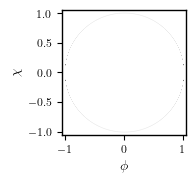

In [43]:
plt.figure(figsize=(2,2))
plt.imshow(
  np.transpose(qdif),
  extent = extent,
  cmap = 'binary',
  origin = 'lower',
  aspect=ratio
)
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig("./figs/angular_vzero.pdf", transparent=True, pad_inches=0.05)
plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_142270/3032067452.py:21: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$')
/tmp/ipykernel_142270/3032067452.py:22: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


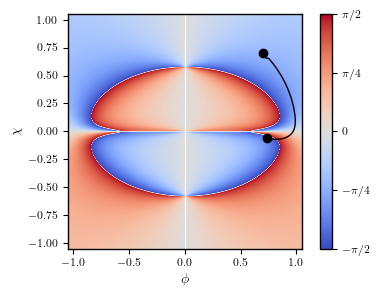

In [44]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(delta),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmin= -np.pi/2,
  vmax= np.pi/2
)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

cbar = plt.colorbar(plot, ticks=[np.pi*n/4 for n in np.arange(-2, 3)])
cbar.set_ticklabels(['$-\\pi/2$','$-\\pi/4$','$0$','$\\pi/4$','$\\pi/2$'])
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig("./figs/angular_delta.pdf", transparent=True, pad_inches=0.05)
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_142270/3598964483.py:18: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$')
/tmp/ipykernel_142270/3598964483.py:19: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


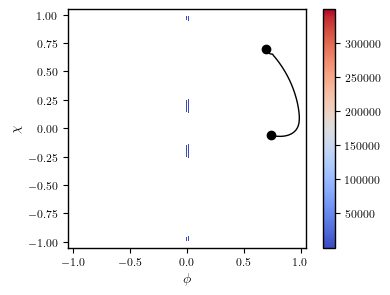

In [45]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio
)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

cbar = plt.colorbar(plot)
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig("./figs/angular_omega.pdf", transparent=True, pad_inches=0.05)
plt.show()

## EGNO supergravity

In [53]:
#load data
model = "egno"
leading = np.load(f"./out/{model}_leading.npy")
exact = np.load(f"./out/{model}_exact.npy")
qdif = np.load(f"./out/{model}_qdif.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")
x, y = np.load("./trajectories/egno_r.npy"), np.load("./trajectories/egno_theta.npy")

extent = (0.46, 0.50, 0.0, np.pi)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])

In [54]:
#side-by-side plot of exact and leading-order evaluations
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(mpl.colors.CSS4_COLORS['black'])

fig, (ax1, ax2, cax) = plt.subplots(1,3,
  figsize=((6,2.5)),
  width_ratios=[1, 1, 0.1]
)

img1 = ax1.imshow(
  np.transpose(leading),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

img2 = ax2.imshow(
  np.transpose(exact),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

#colorbar
cbar = plt.colorbar(
  img2,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=cax
)
cax.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

#trajectories
for ax in [ax1, ax2]:
  ax.plot(x, y, color='black')
  ax.scatter(
    [x[0], x[-1]],
    [y[0], y[-1]],
    color='black'
  )
  ax.set_xlabel('$r$')
  ax.set_yticks(
    [np.pi*x/4 for x in range(0, 5)],
    labels=['0', '$\\pi/4$', '$\\pi/2$', '$3\\pi/4$', '$\\pi$']
  )
ax1.set_ylabel('$\\theta$')

ax2.plot(x, y, color='black')
ax1.plot(x, y, color='black')

fig.savefig("./figs/egno.pdf", transparent=True)
fig.show()

/tmp/ipykernel_142270/1177432048.py:59: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


/usr/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


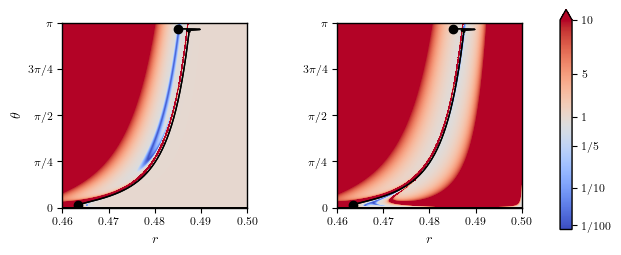

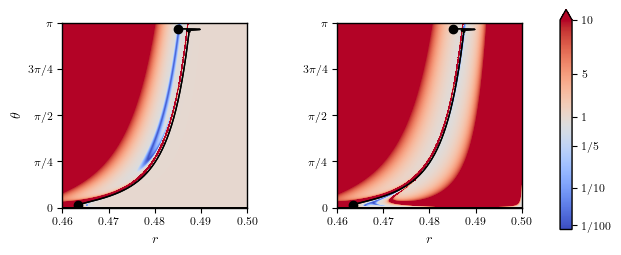

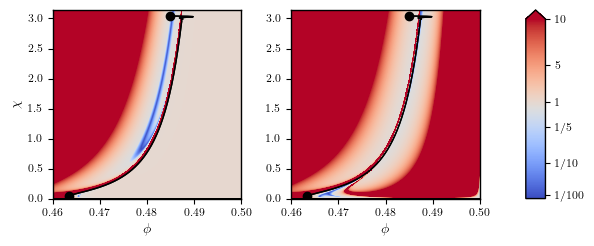

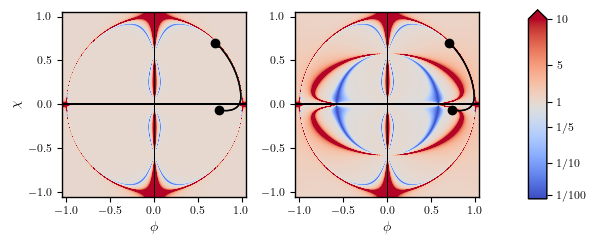

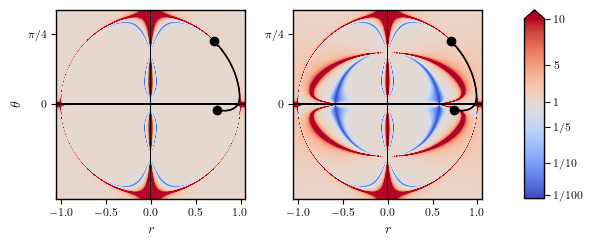

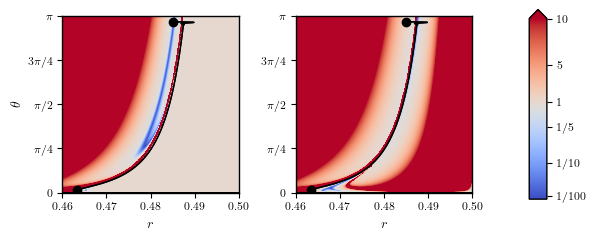

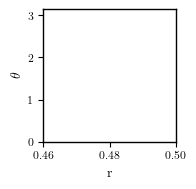

In [56]:
plt.figure(figsize=(2,2))
plt.imshow(
  np.transpose(qdif),
  extent = extent,
  cmap = 'binary',
  origin = 'lower',
  aspect=ratio
)
plt.xlabel('r')
plt.ylabel('$\\theta$')
plt.savefig("./figs/egno_vzero.pdf", transparent=True)
plt.show()

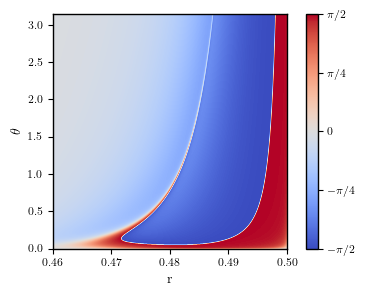

In [57]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(delta),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmin= -np.pi/2,
  vmax= np.pi/2
)
cbar = plt.colorbar(plot, ticks=[np.pi*n/4 for n in np.arange(-2, 3)])
cbar.set_ticklabels(['$-\\pi/2$','$-\\pi/4$','$0$','$\\pi/4$','$\\pi/2$'])
plt.xlabel('r')
plt.ylabel('$\\theta$')
plt.savefig("./figs/egno_delta.pdf", transparent=True, pad_inches=0.05)
plt.show()

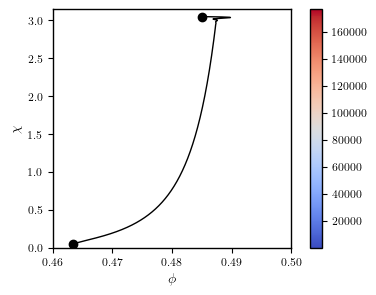

In [58]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio
)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

cbar = plt.colorbar(plot)
plt.xlabel('$\\phi$')
plt.ylabel('$\\chi$')
plt.savefig("./figs/egno_omega.pdf", transparent=True, pad_inches=0.05)
plt.show()

## D5-brane models

In [59]:
#load data
model = "d5"
leading = np.load(f"./out/{model}_leading.npy")
exact = np.load(f"./out/{model}_exact.npy")
qdif = np.load(f"./out/{model}_qdif.npy")
delta = np.load(f"./out/{model}_delta.npy")
omega = np.load(f"./out/{model}_omega.npy")
trajectory = np.loadtxt(f"./trajectories/d5_trajectory.dat")
x, y = trajectory[:,0], trajectory[:, 1]

extent = (0.0, 36.0, 0.0, 4*np.pi)
ratio = (extent[1] - extent[0]) / (extent[-1] - extent[-2])

In [60]:
#side-by-side plot of exact and leading-order evaluations
two_norm = mpl.colors.TwoSlopeNorm(0.25, vmax=10)
cmap = mpl.colormaps['coolwarm'].copy()
cmap.set_over(cmap(1.0))
cmap.set_bad(mpl.colors.CSS4_COLORS['black'])

fig, (ax1, ax2, cax) = plt.subplots(1,3,
  figsize=(6,2.5),
  width_ratios=[1, 1, 0.1]
)

img1 = ax1.imshow(
  np.transpose(leading),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

img2 = ax2.imshow(
  np.transpose(exact),
  extent = extent,
  cmap = cmap,
  norm = two_norm,
  origin = 'lower',
  aspect = ratio
)

#colorbar
cbar = plt.colorbar(
  img2,
  extend='max',
  location='right',
  ticks=[1/100, 1/10, 1/5, 1, 5, 10],
  cax=cax
)
cax.set_yticklabels(['1/100','1/10','1/5', '1', '5', '10'])

#trajectories
for ax in [ax1, ax2]:
  ax.plot(x, y, color='black')
  ax.scatter(
    [x[0], x[-1]],
    [y[0], y[-1]],
    color='black'
  )
  ax.set_xlabel('$r$')
  ax.set_yticks(
    [np.pi*x for x in range(0, 5)],
    labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
  )
ax1.set_ylabel('$\\theta$')

ax2.plot(x, y, color='black')
ax1.plot(x, y, color='black')

fig.savefig("./figs/d5.pdf", transparent=True, pad_inches=0.05)
fig.show()

<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
<>:51: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_142270/1899283300.py:51: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_142270/1899283300.py:51: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_142270/1899283300.py:51: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_142270/1899283300.py:51: SyntaxWarning: invalid escape sequence '\p'
  labels=['0', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$']
/tmp/ipykernel_142270/1899283300.py:59: 

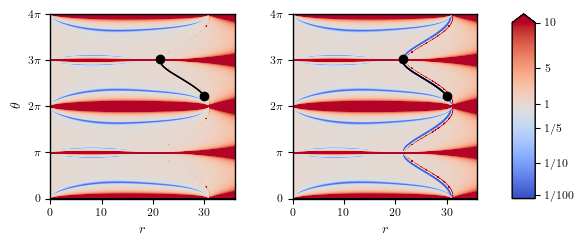

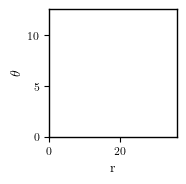

In [61]:
plt.figure(figsize=(2,2))
plt.imshow(
  np.transpose(qdif),
  extent = extent,
  cmap = 'binary',
  origin = 'lower',
  aspect=ratio
)
plt.xlabel('r')
plt.ylabel('$\\theta$')
plt.savefig("./figs/d5_vzero.pdf", transparent=True, pad_inches=0.05)
plt.show()

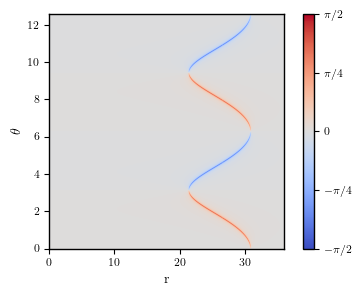

In [62]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(delta),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio,
  vmin= -np.pi/2,
  vmax= np.pi/2
)
cbar = plt.colorbar(plot, ticks=[np.pi*n/4 for n in np.arange(-2, 3)])
cbar.set_ticklabels(['$-\\pi/2$','$-\\pi/4$','$0$','$\\pi/4$','$\\pi/2$'])
plt.xlabel('r')
plt.ylabel('$\\theta$')
plt.savefig("./figs/d5_delta.pdf", transparent=True, pad_inches=0.05)
plt.show()

<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_142270/1672293113.py:18: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\phi$')
/tmp/ipykernel_142270/1672293113.py:19: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi$')


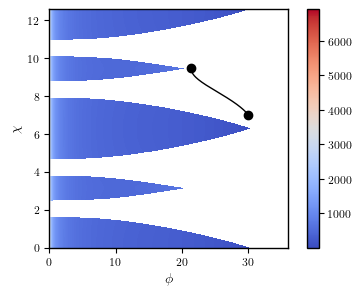

In [63]:
plt.figure(figsize=(4,3))
plot = plt.imshow(
  np.transpose(omega),
  extent= extent,
  cmap= 'coolwarm',
  origin= 'lower',
  aspect= ratio
)

plt.plot(x, y, color='black')
plt.scatter(
  [x[0], x[-1]],
  [y[0], y[-1]],
  color='black'
)

cbar = plt.colorbar(plot)
plt.xlabel('$\phi$')
plt.ylabel('$\chi$')
plt.savefig("./figs/d5_omega.pdf", transparent=True, pad_inches=0.05)
plt.show()